Cinq cents pignons ont un poids moyen de 5,02 gr et un écart-type de 0,30 gr. Trouver la probabilité pour qu’un échantillon de 100 pignons choisis au hasard ait un poids total (a) compris entre 496 et 500 gr, (b) plus grand que 510 gr.


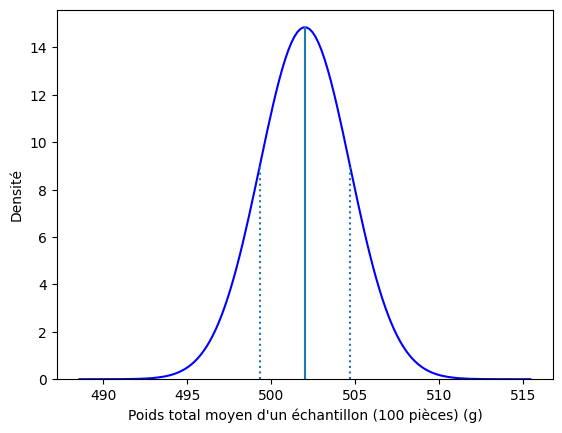

In [1]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
from statistics import mean 

random.seed(1968)

mu = 5.02
sigma = 0.30
N = 500

taille_echantillon = 100

sigma_echantillon_exhaustif = sigma/math.sqrt(taille_echantillon)*math.sqrt((N-taille_echantillon)/(N-1))

def distr_poids_echantillon(x):
    return norm.pdf((x['poids_piece']-mu)/sigma_echantillon_exhaustif)/sigma_echantillon_exhaustif

fac = 5
poids_min = mu - fac*sigma_echantillon_exhaustif
poids_max = mu + fac*sigma_echantillon_exhaustif

distribution_echantillon_df = pd.DataFrame({'poids_piece':np.linspace(poids_min,poids_max,150)})
distribution_echantillon_df['dens'] = distribution_echantillon_df.apply(distr_poids_echantillon,axis=1)

distribution_echantillon_df['poids_echantillon'] = taille_echantillon*distribution_echantillon_df['poids_piece']
plt.plot(distribution_echantillon_df['poids_echantillon'],distribution_echantillon_df['dens'],color='blue')
plt.vlines(taille_echantillon*mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif)
plt.vlines([taille_echantillon*(mu-sigma_echantillon_exhaustif),taille_echantillon*(mu+sigma_echantillon_exhaustif)],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_exhaustif,linestyles='dotted')
plt.xlabel('Poids total moyen d\'un échantillon ({} pièces) (g)'.format(taille_echantillon))
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

# compris entre 496 et 500 gr

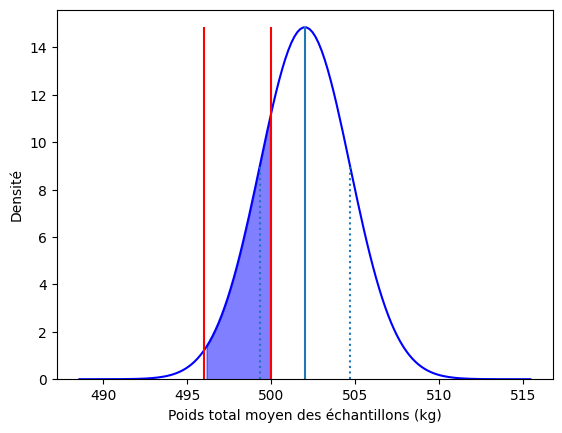

In [2]:
poids_max = 500
poids_min = 496

plt.plot(distribution_echantillon_df['poids_echantillon'],distribution_echantillon_df['dens'],color='blue')
sub_df = distribution_echantillon_df[(distribution_echantillon_df['poids_echantillon']>=poids_min)&(distribution_echantillon_df['poids_echantillon']<=poids_max)]
plt.fill_between(sub_df['poids_echantillon'],sub_df['dens'],color='blue',alpha=0.5)
plt.vlines(taille_echantillon*mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif)
plt.vlines([taille_echantillon*(mu-sigma_echantillon_exhaustif),taille_echantillon*(mu+sigma_echantillon_exhaustif)],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_exhaustif,linestyles='dotted')
plt.vlines(poids_min,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif, color='red')
plt.vlines(poids_max,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif, color='red')
plt.xlabel('Poids total moyen des échantillons (kg)')
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

In [3]:
aire = (norm.cdf(poids_max/taille_echantillon,mu,sigma_echantillon_exhaustif)-norm.cdf(poids_min/taille_echantillon,mu,sigma_echantillon_exhaustif))
print('Aire bleue sous la courbe:{:.4f}'.format(aire))
print('ou encore {:.2f}% de chance que la moyenne d\'échantillon tombe dans l\'intervalle [{},{}]'.format(aire*100,poids_min,poids_max))

Aire bleue sous la courbe:0.2155
ou encore 21.55% de chance que la moyenne d'échantillon tombe dans l'intervalle [496,500]


# Plus grand que 510g

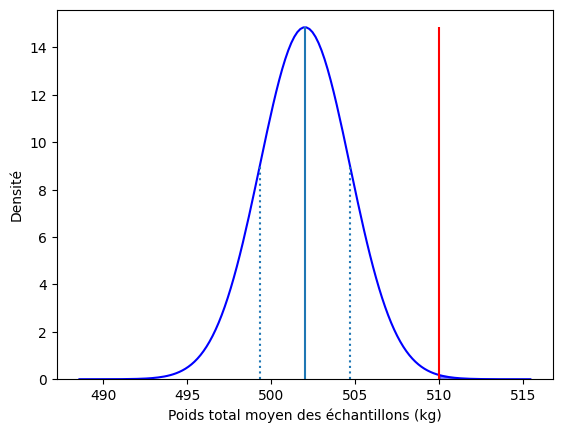

In [4]:
poids_min = 510

plt.plot(distribution_echantillon_df['poids_echantillon'],distribution_echantillon_df['dens'],color='blue')
sub_df = distribution_echantillon_df[distribution_echantillon_df['poids_echantillon']>=poids_min]
plt.fill_between(sub_df['poids_echantillon'],sub_df['dens'],color='blue',alpha=0.5)
plt.vlines(taille_echantillon*mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif)
plt.vlines([taille_echantillon*(mu-sigma_echantillon_exhaustif),taille_echantillon*(mu+sigma_echantillon_exhaustif)],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_exhaustif,linestyles='dotted')
plt.vlines(poids_min,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_exhaustif, color='red')
plt.xlabel('Poids total moyen des échantillons (kg)')
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

In [5]:
aire = (1-norm.cdf(poids_min/taille_echantillon,mu,sigma_echantillon_exhaustif))
print('Aire bleue sous la courbe:{:.4f}'.format(aire))
print('ou encore {:.2f}% de chance que la moyenne d\'échantillon tombe dans l\'intervalle [{},->]'.format(aire*100,poids_min))

Aire bleue sous la courbe:0.0014
ou encore 0.14% de chance que la moyenne d'échantillon tombe dans l'intervalle [510,->]
